In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
filepath = "/users/musabbelahouel/documents/airbnb-amsterdam/listings_details.csv"
listing_data = pd.read_csv(filepath, index_col="id", parse_dates = True)

/Users/musabbelahouel/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [168]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 2818 to 30580413
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_url                       20030 non-null  object 
 1   scrape_id                         20030 non-null  int64  
 2   last_scraped                      20030 non-null  object 
 3   name                              19992 non-null  object 
 4   summary                           19510 non-null  object 
 5   space                             14579 non-null  object 
 6   description                       19906 non-null  object 
 7   experiences_offered               20030 non-null  object 
 8   neighborhood_overview             13257 non-null  object 
 9   notes                             9031 non-null   object 
 10  transit                           13635 non-null  object 
 11  access                            12227 non-null  object 
 12

In [69]:
host = listing_data[['host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_total_listings_count']]
host = host.reset_index()

In [70]:
host = host.drop(['id'], axis = 1)
host

,host_id,host_name,host_since,host_location,host_response_time,host_total_listings_count
0,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",within an hour,1.0
1,3806,Maartje,2008-10-24,"Amsterdam, Noord-Holland, The Netherlands",within an hour,1.0
2,59484,Alex,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",within a few hours,2.0
3,56142,Joan,2009-11-20,"New York, New York, United States",within a few hours,2.0
4,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,1.0
...,...,...,...,...,...,...
20025,13399651,Marieke,2014-03-22,"Amsterdam, North Holland, Netherlands",NaN,1.0
20026,1595885,Evita,2012-01-11,"Zurich, Zurich, Switzerland",NaN,2.0
20027,87866499,Tommaso,2016-08-04,"Amsterdam, North Holland, Netherlands",NaN,2.0
20028,1595885,Evita,2012-01-11,"Zurich, Zurich, Switzerland",NaN,2.0


###### Hosts with highest listing count

So we can get thier opinion, new service (preparing their apartment)

###### Drop duplicate rows

In [73]:
df = host[host['host_id'].duplicated(keep = 'first') == False]

In [75]:
host = df

In [78]:
host = host.sort_values(["host_total_listings_count"], ascending = False)

In [92]:
host.head(20)

,host_id,host_name,host_since,host_location,host_response_time,host_total_listings_count
0,121985032,Tess - BELVILLA,2017-03-22,"Zürich, Zurich, Switzerland",within a few hours,698.0
1,19907019,Henry & Alice,2014-08-12,"Amsterdam, North Holland, The Netherlands",NaN,287.0
2,76104209,Rated,2016-06-06,"London, England, United Kingdom",within an hour,271.0
3,65859990,Martijn,2016-04-05,"Amsterdam, North Holland, Netherlands",within a few hours,213.0
4,2856748,Ruchi,2012-07-07,LONDON,within an hour,130.0
5,1464510,Michiel And Jane,2011-12-02,"Amsterdam, North Holland, The Netherlands",within an hour,109.0
6,517215,Niels En Viv (Welcome Back),2011-04-18,"Amsterdam, North Holland, The Netherlands",within a few hours,108.0
7,20648813,Darryl,2014-08-28,"London, England, United Kingdom",within a few hours,96.0
8,46691672,Eva & Kobe,2015-10-16,"Amsterdam, North Holland, Netherlands",within an hour,49.0
9,44168250,Ruben,2015-09-14,"Amsterdam, North Holland, Netherlands",within a day,48.0


###### The difference in booking daily vs weekly vs monthly

In [136]:
weekly

,price,weekly_price,monthly_price
id,,,
3209,160.00,543.00,"2,000.00"
25428,125.00,650.00,"2,000.00"
27886,150.00,810.00,"2,500.00"
28871,75.00,499.00,"1,956.00"
29051,55.00,350.00,"1,435.00"
...,...,...,...
26143816,199.00,750.00,"2,900.00"
26494184,195.00,"1,300.00","4,500.00"
26589371,110.00,575.00,"1,725.00"


In [126]:
weekly['weekly_price'] = weekly['weekly_price'].replace('.','')

In [109]:
weekly = listing_data[['price', 'weekly_price', 'monthly_price']]

In [115]:
weekly['monthly_price'] = weekly['monthly_price'].str.slice(1)

In [110]:
weekly = weekly.dropna(how = 'any')

In [141]:
weekly['weekly_price'] = pd.to_numeric(weekly['weekly_price'])

ValueError: Unable to parse string "1,400.00" at position 5

In [137]:
weekly['Diff_(w-d)'] = weekly['weekly_price'] - weekly['price']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [140]:
print (weekly[pd.to_numeric(weekly.weekly_price, errors='coerce').isnull()])

             price weekly_price monthly_price
id                                           
31080       219.00     1,400.00      4,000.00
49790       225.00     1,250.00      3,750.00
115795      165.00     1,053.00      3,717.00
156815      695.00     3,965.00      9,995.00
184282      230.00     1,300.00      3,000.00
...            ...          ...           ...
10696168    410.00     1,000.00      3,500.00
11040717  2,500.00     1,000.00      2,500.00
11054922    299.00     1,500.00      5,000.00
12039992    250.00     1,000.00      3,000.00
26494184    195.00     1,300.00      4,500.00

[316 rows x 3 columns]


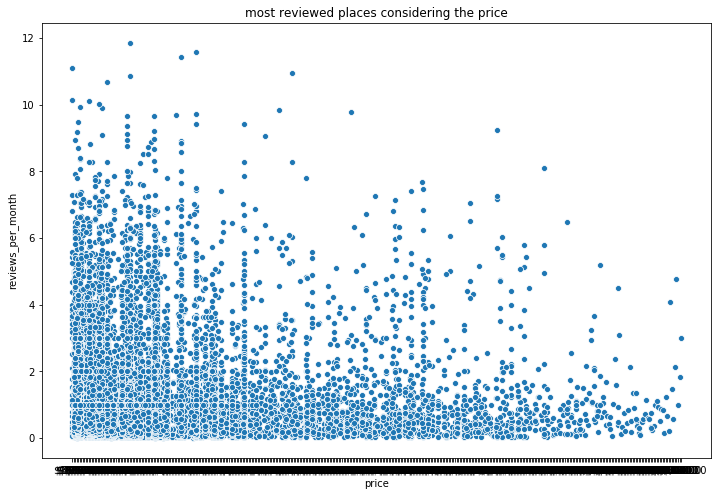

In [53]:
plt.figure(figsize=(12, 8))
plt.title('most reviewed places considering the price')
plt.ylabel("reviews per month")
sns.scatterplot(x=listing_data['price'], y=listing_data['reviews_per_month'])

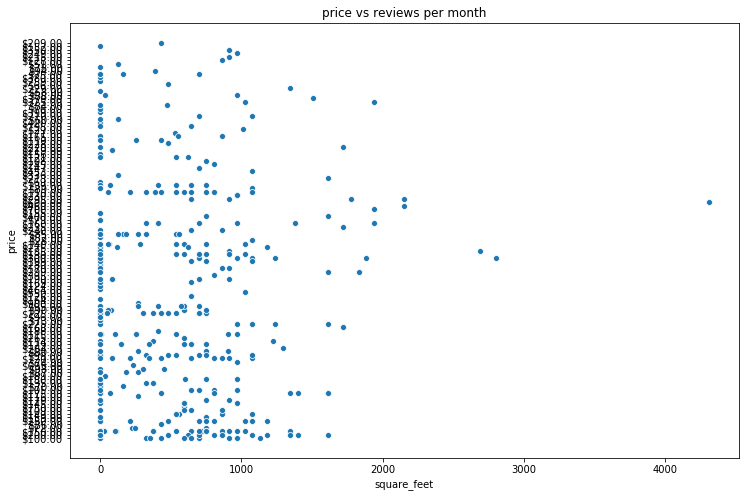

In [52]:
plt.figure(figsize=(12, 8))
plt.title('price vs reviews per month')
plt.ylabel("reviews per month")
sns.scatterplot(x=listing_data['square_feet'], y=listing_data['price'])

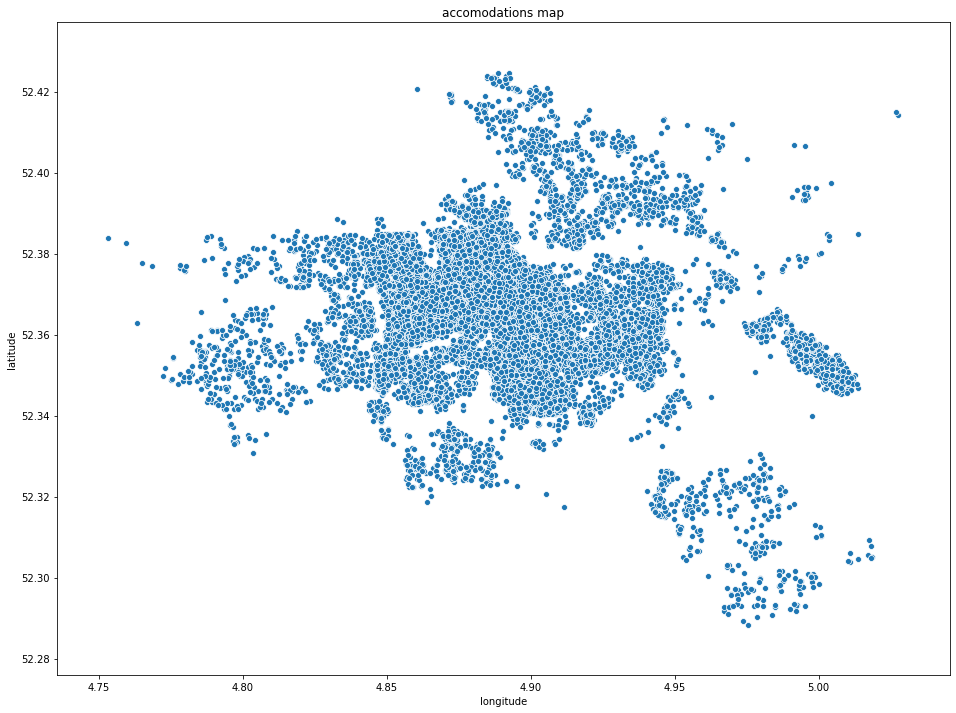

In [63]:
plt.figure(figsize=(16, 12))
plt.title('accomodations map')
plt.ylabel("")
sns.scatterplot(x=listing_data['longitude'], y=listing_data['latitude'])

In [141]:
byproperty = listing_data.groupby('property_type').count().reset_index()
byproperty

,property_type,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Aparthotel,73,73,73,73,66,7,73,73,0,...,73,7,0,73,73,73,73,73,73,3
1,Apartment,15582,15582,15582,15550,15173,11142,15473,15582,10153,...,15582,0,15102,15582,15582,15582,15582,15582,15582,13768
2,Barn,4,4,4,4,4,4,4,4,3,...,4,0,4,4,4,4,4,4,4,4
3,Bed and breakfast,455,455,455,455,430,389,454,455,336,...,455,2,450,455,455,455,455,455,455,409
4,Boat,372,372,372,372,361,299,370,372,255,...,372,0,362,372,372,372,372,372,372,344
5,Boutique hotel,28,28,28,28,28,24,28,28,23,...,28,0,28,28,28,28,28,28,28,26
6,Bungalow,12,12,12,12,12,10,12,12,9,...,12,0,11,12,12,12,12,12,12,10
7,Cabin,14,14,14,14,14,11,14,14,7,...,14,0,13,14,14,14,14,14,14,12
8,Camper/RV,2,2,2,2,2,1,2,2,2,...,2,0,2,2,2,2,2,2,2,0
9,Campsite,2,2,2,2,2,1,2,2,1,...,2,0,2,2,2,2,2,2,2,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

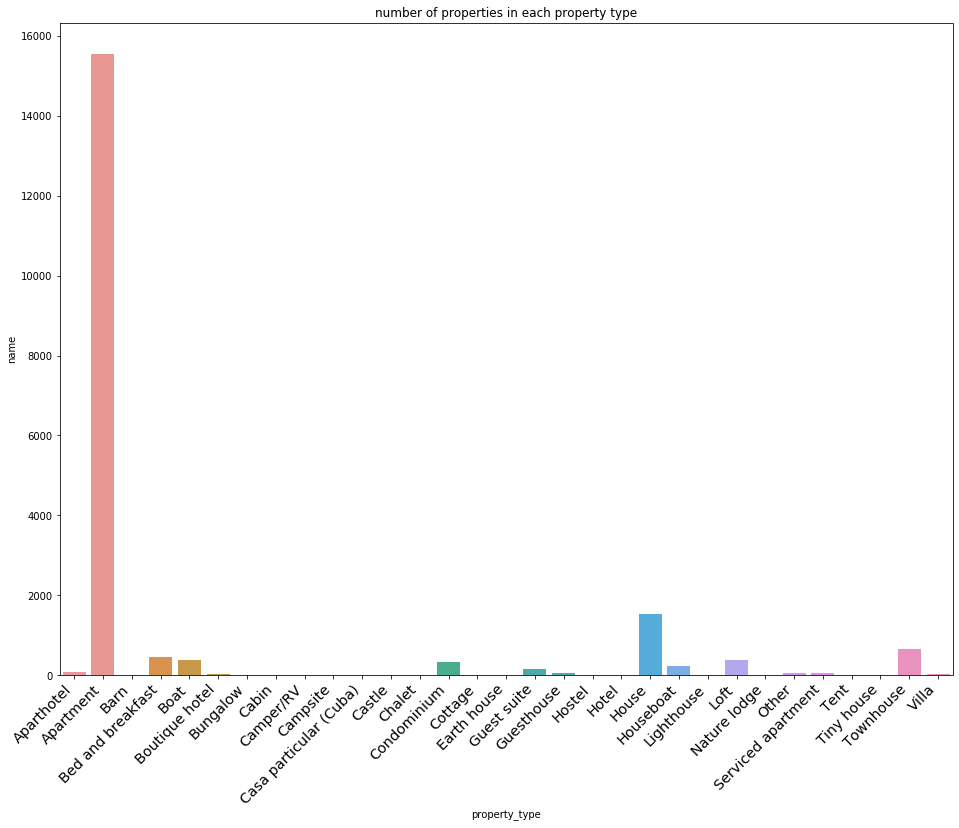

In [159]:
plt.figure(figsize=(16, 12))
plt.title('number of properties in each property type')
plt.ylabel("")
sns.barplot(x = byproperty['property_type'], y = byproperty['name'])
plt.xticks(rotation=45, 
           horizontalalignment='right', 
           fontsize='x-large',
           fontweight='light'
          )

NameError: name 'numpy' is not defined

AttributeError: 'int' object has no attribute 'info'